In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Summary Statistics


In [ ]:
df = pd.read_csv('Titanic-Dataset.csv')

# Displaying basic information about the dataset
print("Basic Dataset Information:")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

# Summary statistics that includes mean, median, std, min, max etc
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values, and displaying data types
print("\nMissing Values:")
print(df.isnull().sum())
print("\nData Types:")
print(df.dtypes)

# Check unique values in categorical columns
print("\nUnique Values in 'Survived':", df['Survived'].unique())
print("Unique Values in 'Pclass':", df['Pclass'].unique())
print("Unique Values in 'Sex':", df['Sex'].unique())
print("Unique Values in 'Embarked':", df['Embarked'].unique())

Basic Dataset Information:
Shape: (891, 12)

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        

 Histograms and boxplots for numeric features

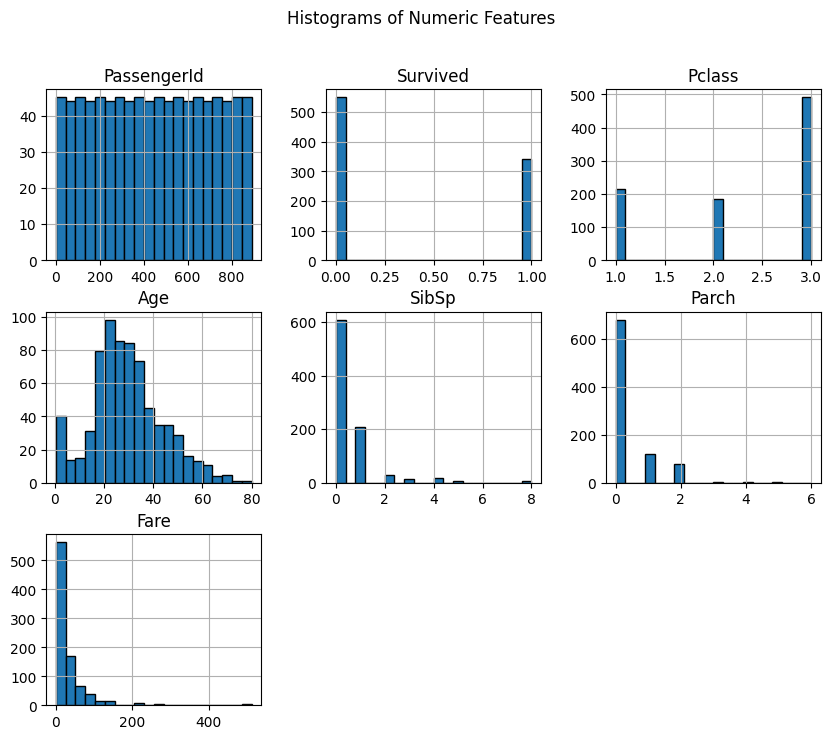

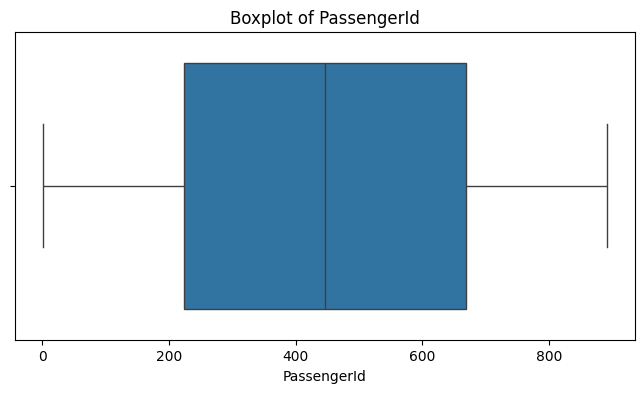

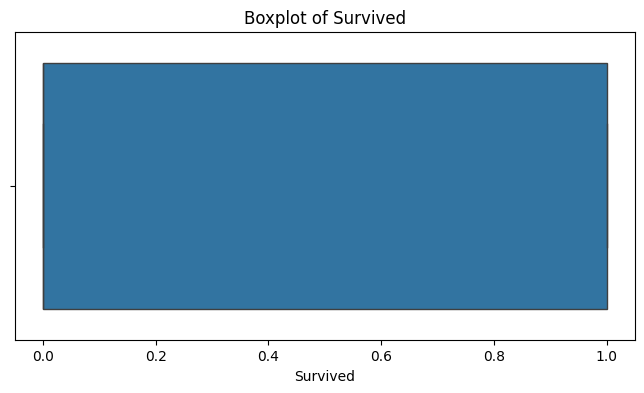

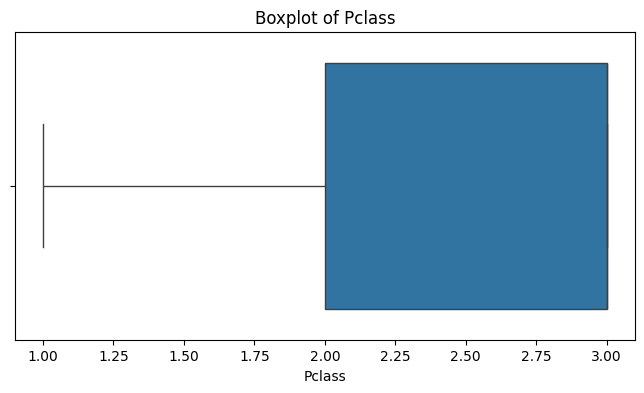

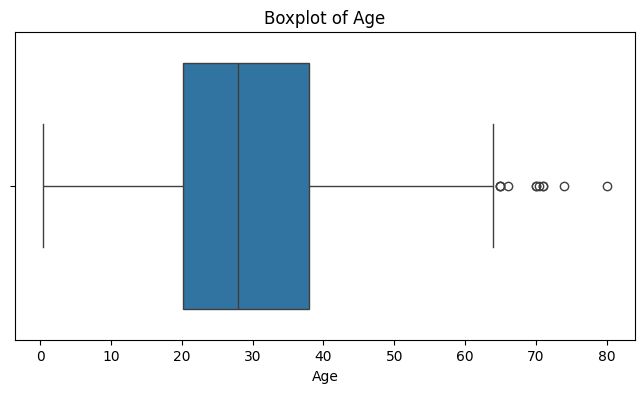

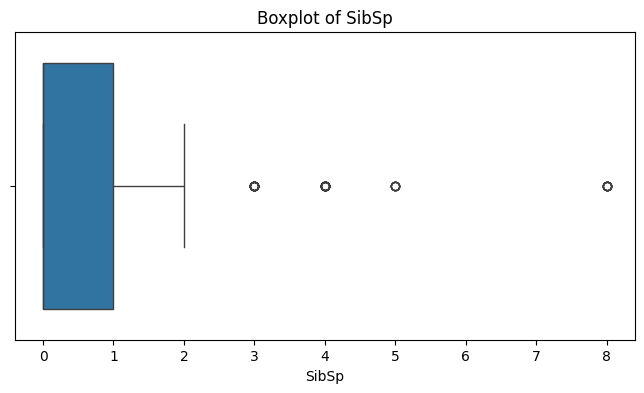

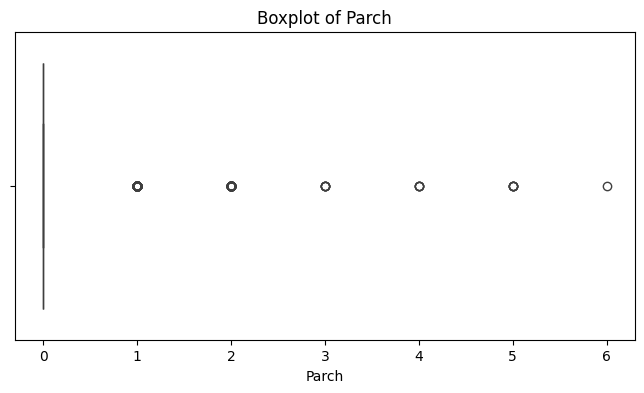

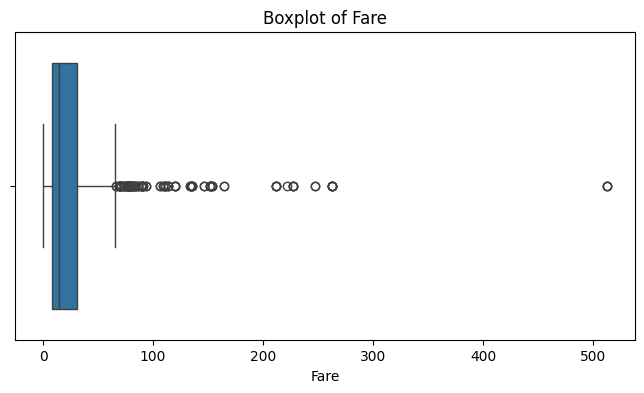

In [ ]:
# Histograms 
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_features].hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numeric Features')
plt.show()

# Boxplots
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=feature)  
    plt.title(f'Boxplot of {feature}')
    plt.show()


Using Pairplot / Coorelation matrix for feature relationships

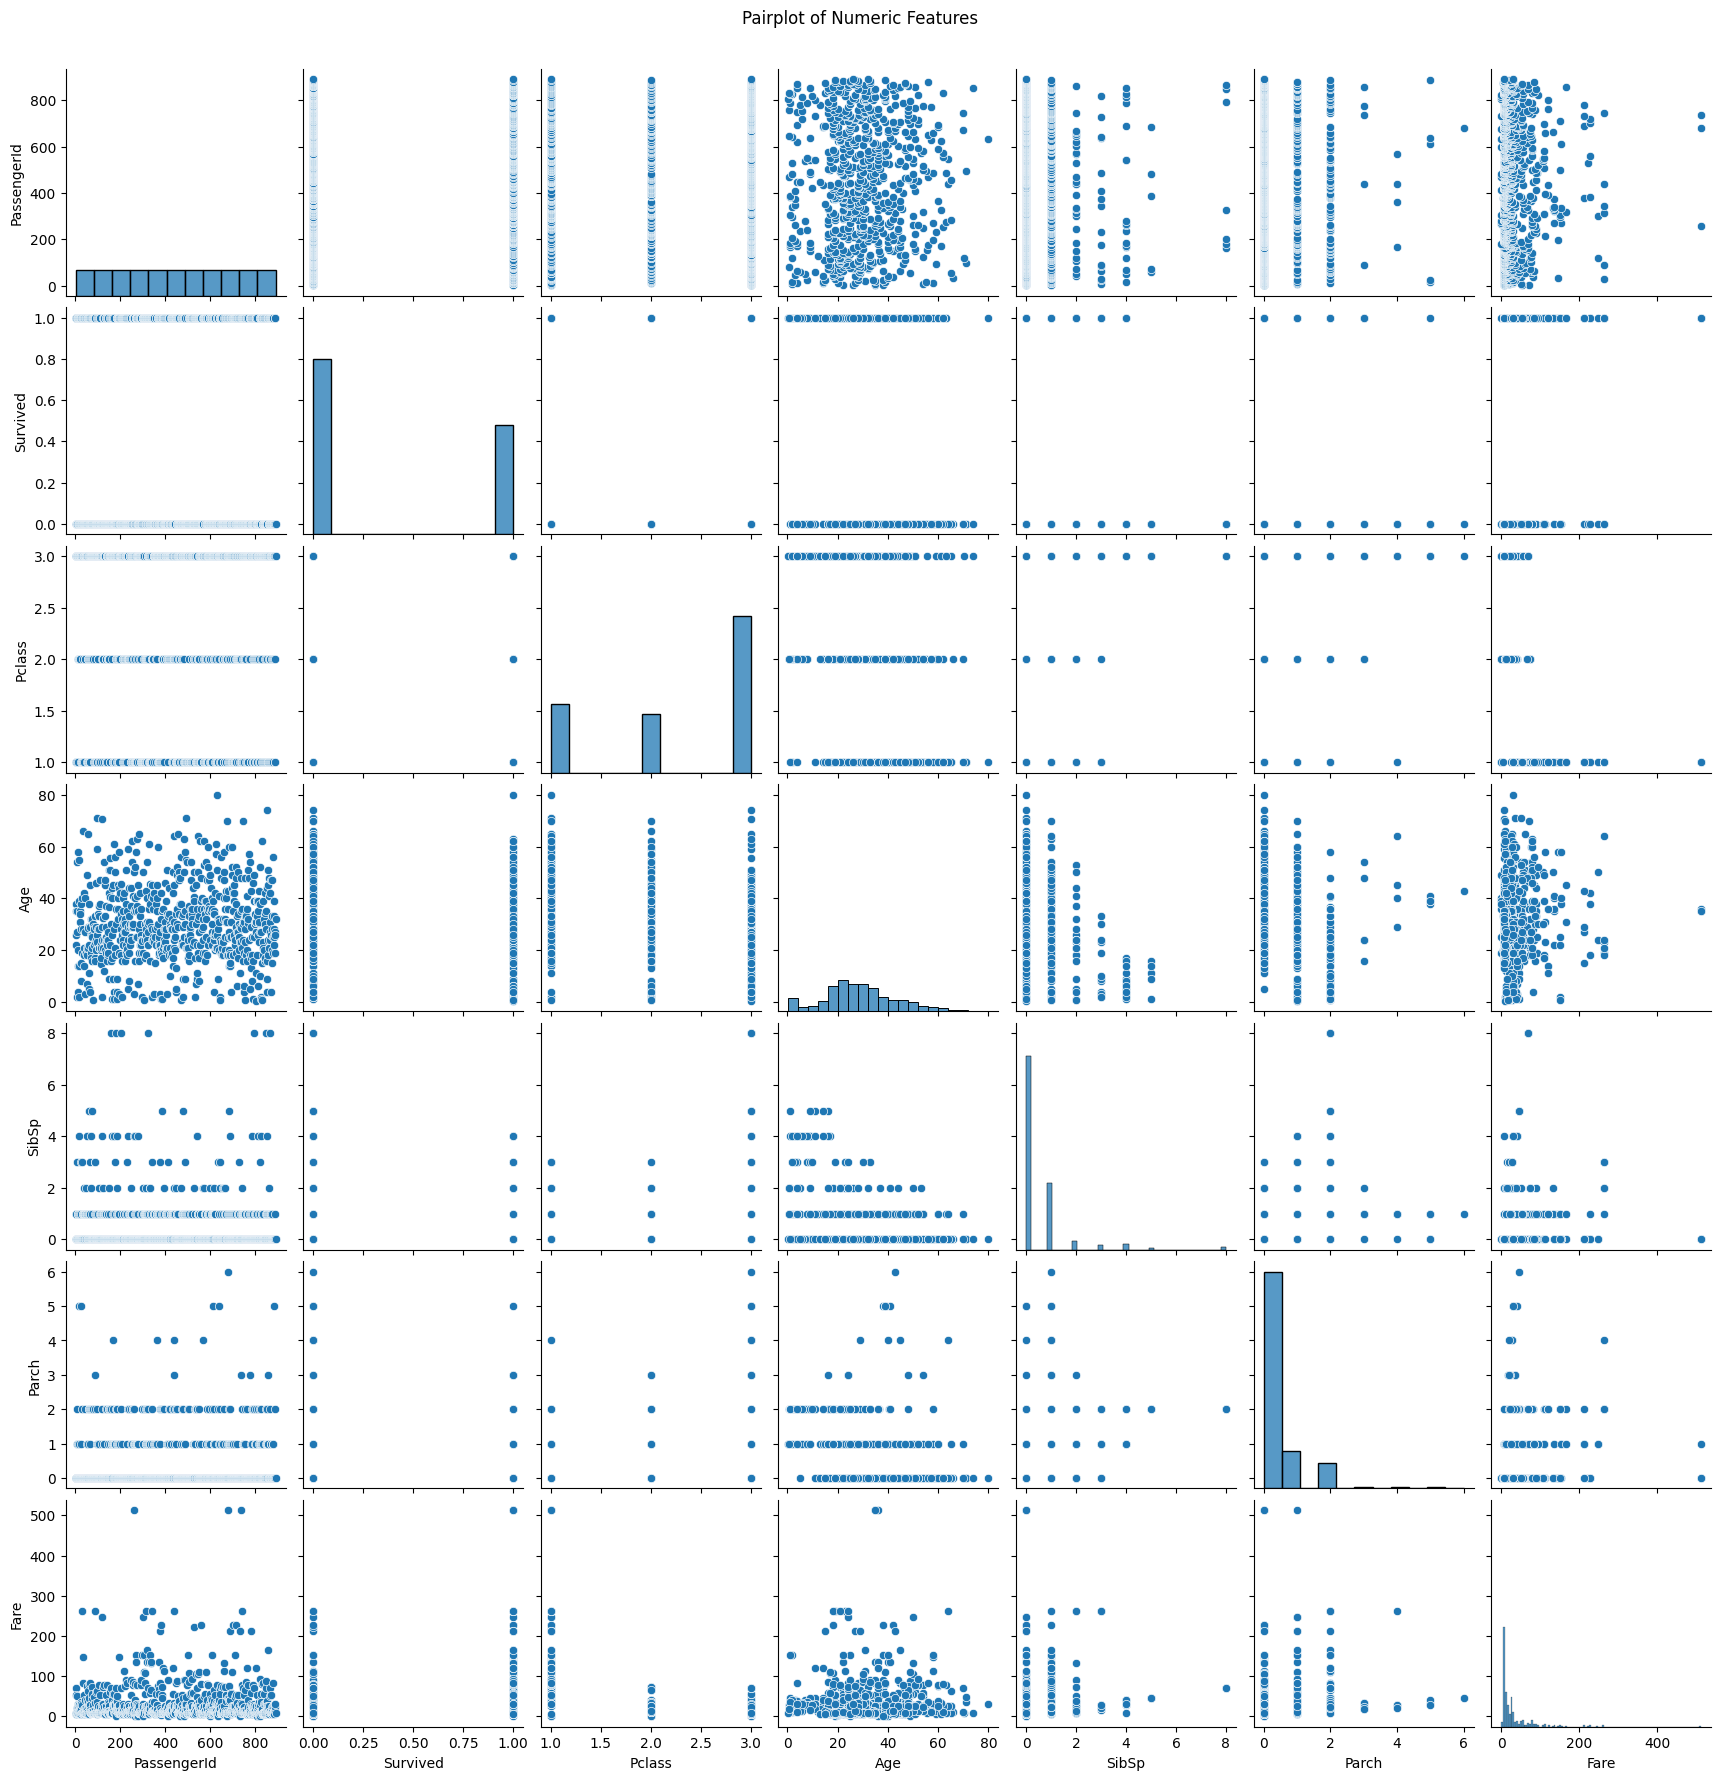

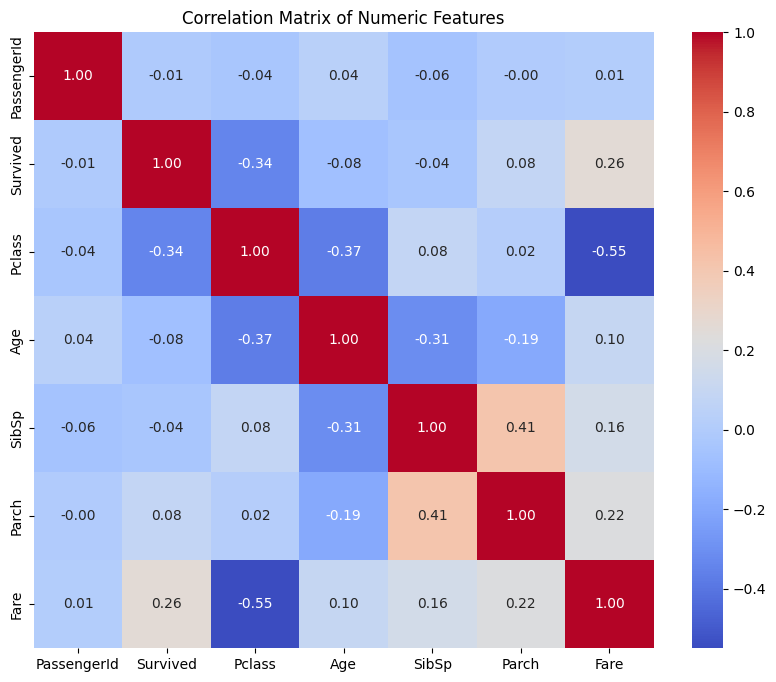

In [ ]:

# Pairplot for numeric features
sns.pairplot(df[numeric_features])
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

# Correlation Matrix
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

Identifying patterns / trends / anomalies in the data

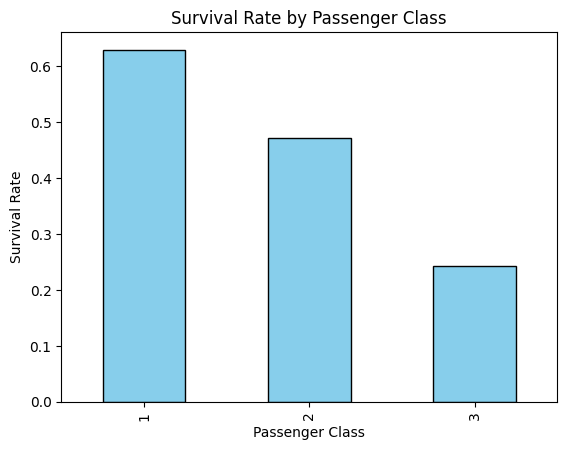

In [ ]:
# Visualizing survival rate by class using a bar plot
if 'Survived' in df.columns and 'Pclass' in df.columns:
    survival_rate = df.groupby('Pclass')['Survived'].mean()
    survival_rate.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Survival Rate by Passenger Class')
    plt.xlabel('Passenger Class')
    plt.ylabel('Survival Rate')
    plt.show()

Basic feature-level inferences from visuals

In [ ]:
# Plotting Age vs Fare with Survival Status
if 'Age' in df.columns and 'Fare' in df.columns and 'Survived' in df.columns:
    fig = px.scatter(
        df,
        x='Age',
        y='Fare',
        color='Survived',
        title='Age vs Fare (Colored by Survival Status)',
        labels={'Survived': 'Survival Status'}
    )
    fig.show()